In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv("exercise.csv")
df = df.dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  164 non-null    int64  
 1   Pulse     164 non-null    int64  
 2   Maxpulse  164 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


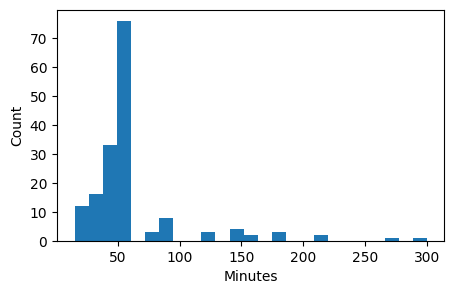

In [4]:
fig, ax = plt.subplots(1,1, figsize = (5,3))
ax.hist(df.Duration, bins=25)
ax.set_xlabel("Minutes")
ax.set_ylabel("Count")

plt.savefig("img/plot1.png")

In [5]:
df.head(3)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0


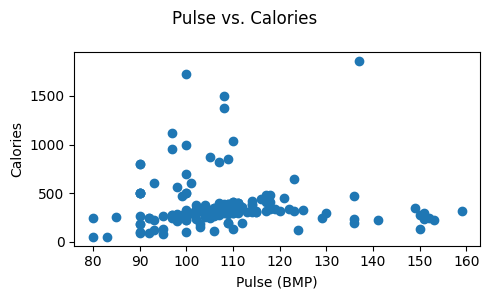

In [6]:
fig, ax = plt.subplots(1,1,figsize=(5,3), layout = "tight")

ax.scatter(df['Pulse'], df['Calories'])
fig.suptitle("Pulse vs. Calories")
ax.set_xlabel("Pulse (BMP)")
ax.set_ylabel("Calories")

plt.savefig("img/pulse-v-calories.png")

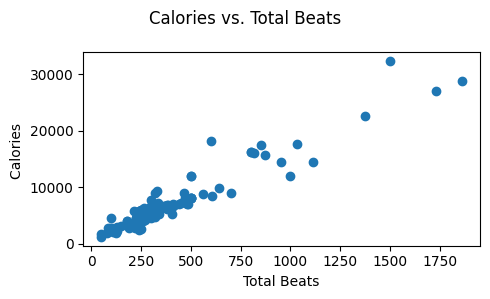

In [7]:
fig, ax = plt.subplots(1,1,figsize=(5,3), layout = "tight")


ax.scatter(df['Calories'], df['Pulse']*df['Duration'])
fig.suptitle("Calories vs. Total Beats")
ax.set_xlabel("Total Beats")
ax.set_ylabel("Calories ")

plt.savefig("img/duration-v-pulse.png")

plt.show()

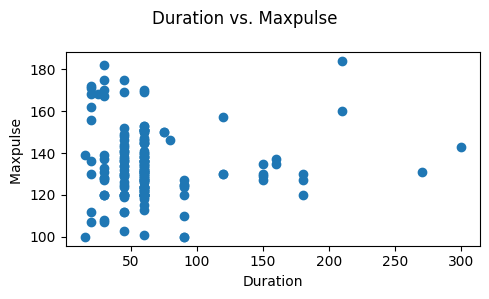

In [8]:
fig, ax = plt.subplots(1,1,figsize=(5,3), layout = "tight")


ax.scatter(df['Duration'],df['Maxpulse'])
fig.suptitle("Duration vs. Maxpulse")
ax.set_xlabel("Duration")
ax.set_ylabel("Maxpulse ")

plt.savefig("img/duration-v-maxpulse.png")

plt.show()

#polyfit line of best fit

In [9]:
df['Beats'] = df['Duration'] * df['Pulse']

In [10]:
df.head()

,Duration,Pulse,Maxpulse,Calories,Beats
0,60,110,130,409.1,6600
1,60,117,145,479.0,7020
2,60,103,135,340.0,6180
3,45,109,175,282.4,4905
4,45,117,148,406.0,5265


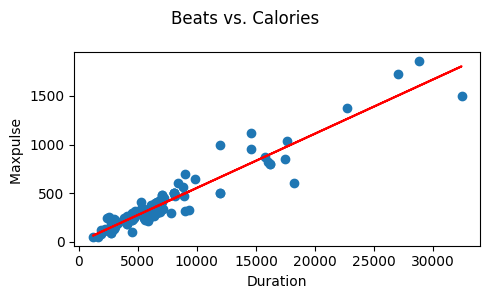

In [23]:
fig, ax = plt.subplots(1,1,figsize=(5,3), layout = "tight")


ax.scatter(df['Beats'],df['Calories'])
fig.suptitle("Beats vs. Calories")
ax.set_xlabel("Heartbeats")
ax.set_ylabel("Calories ")
a, b = np.polyfit(df["Beats"], df["Calories"], 1)
ax.plot(df["Beats"], a*df["Beats"] + b, color="red")

plt.savefig("img/beats-v-calories.png")

plt.show()

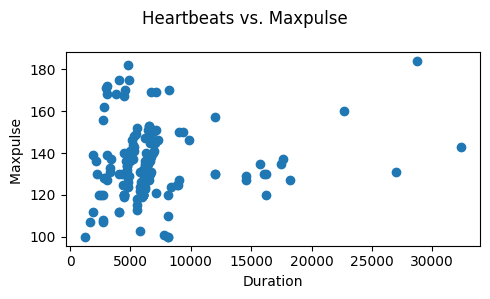

In [12]:
fig, ax = plt.subplots(1,1,figsize=(5,3), layout = "tight")


ax.scatter(df['Beats'],df['Maxpulse'])
fig.suptitle("Beats vs. Maxpulse")
ax.set_xlabel("Duration")
ax.set_ylabel("Maxpulse ")

plt.savefig("img/duration-v-maxpulse.png")

plt.show()

In [13]:
## Scikit learn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [22]:
X, y = df[["Beats"]], df.Calories

In [23]:
model.fit(X,y)

LinearRegression()

In [24]:
r_squared = model.score(X,y)

In [25]:
print(r_squared)

0.9004021938294237
